<a href="https://colab.research.google.com/github/vicpb/data_science_analise_saude_medicina/blob/main/CursoDataScienceeSaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,152411,152448,152497,152511,152583,152660,152722,152822,152960,153007,153033,153148,153220,153260,153306,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583


In [2]:
confirmed.shape

(279, 619)

In [3]:
confirmed["Country/Region"]

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [35]:
last_date = "9/27/21"

In [36]:
confirmed[last_date]

0      155072
1      168188
2      202877
3       15189
4       55583
        ...  
274    766051
275    398946
276      8988
277    208867
278    129919
Name: 9/27/21, Length: 279, dtype: int64

In [6]:
confirmed["Country/Region"].unique

<bound method Series.unique of 0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object>

In [7]:
confirmed["Province/State"].unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
274    NaN
275    NaN
276    NaN
277    NaN
278    NaN
Name: Province/State, Length: 279, dtype: object>

In [8]:
confirmed.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21
51,Quebec,Canada,52.939900,-73.549100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,383191,383718,384281,384744,385120,385465,386015,386618,387230,387834,388413,388799,389224,389914,390613,391363,392029,392807,393337,393852,394452,395155,396034,396034,397786,398425,399058,399843,400625,401462,402283,403025,403704,404291,404974,405728,406429,406429,406429,408462
249,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13433,13700,13981,14216,14403,14935,15296,15603,15960,16236,16402,16515,16682,16941,17183,17379,17468,17618,17698,17888,18046,18211,18308,18382,18515,18597,18715,18786,18856,18943,18994,19033,19058,19125,19206,19264,19308,19350,19382,19398
269,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,...,6392160,6429147,6460930,6492906,6524581,6555200,6590747,6628709,6666399,6698486,6731423,6757650,6789581,6825074,6862904,6904969,6941611,6978126,7018927,7056106,7094592,7132072,7168806,7197662,7226276,7256559,7282810,7312683,7339009,7371301,7400739,7429746,7465448,7496543,7530103,7565867,7601487,7631233,7664230,7701715
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,219,226,245,261,291,300,314,335,361,374,386,398,421,433,451,483,498,509,528,548,563,587,602,617,630,652,665,680,710,725,742,749,765,782,798,817,849,874,893,906
148,NaN,Indonesia,-0.789300,113.921300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3930300,3950304,3967048,3979456,3989060,4008166,4026837,4043736,4056354,4066404,4073831,4079267,4089801,4100138,4100138,4116890,4123617,4129020,4133433,4140634,4147365,4153355,4158731,4163732,4167511,4170088,4174216,4178164,4181309,4185144,4188529,4190763,4192695,4195958,4198678,4201559,4204116,4206253,4208013,4209403
137,NaN,Grenada,12.116500,-61.679000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,196,196,212,222,222,230,266,295,317,317,357,357,461,539,817,817,1098,1238,1238,1613,1748,1748,1947,2345,2345,2386,2646,2740,3262,3490,3490,3841,4077,4356,4356,4638,4766,4766,4922,5005
133,NaN,Georgia,42.315400,43.356900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,501297,506040,510941,514744,517098,523022,528043,532171,536202,540449,543118,545033,549811,553697,556909,559943,562627,564837,565957,567922,570493,572948,575210,579031,580869,581815,585036,587551,589727,591766,593763,595264,595926,598396,600412,602065,603763,605360,606492,607155
91,Zhejiang,China,29.183200,120.093400,10,27,43,62,104,128,173,296,428,538,599,661,724,829,895,954,1006,1048,1075,1092,1117,1131,1145,1155,1162,1167,1171,1172,1174,1175,1203,1205,1205,1205,1205,1205,...,1418,1420,1420,1421,1428,1428,1429,1429,1429,1429,1430,1430,1431,1432,1433,1437,1437,1437,1438,1438,1439,1439,1439,1439,1439,1439,1440,1441,1442,1442,1442,1444,1446,1446,1446,1446,1446,1446,1447,1447
67,Hebei,China,39.549000,116.130600,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,13

In [9]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
9/23/21                154800
9/24/21                154960
9/25/21                154960
9/26/21                154960
9/27/21                155072
Name: 0, Length: 619, dtype: object

In [10]:
confirmed.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
9/23/21            165864
9/24/21            166690
9/25/21            167354
9/26/21            167893
9/27/21            168188
Name: 1, Length: 619, dtype: object

In [11]:
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
9/23/21              1008
9/24/21              1008
9/25/21              1008
9/26/21              1008
9/27/21              1008
Name: Anhui, Length: 618, dtype: object

In [12]:
#iloc localiza por linha
#loc localiza por idx

In [13]:
#valor falso pois o erro é muito grande
# não vou considerar essa análise pois tem muito campo vazio (muita disparidade no padrão)

confirmed["Country/Region"].value_counts()

China                    34
Canada                   16
France                   12
United Kingdom           12
Australia                 8
                         ..
Niger                     1
Cameroon                  1
Saint Kitts and Nevis     1
Bahamas                   1
Sao Tome and Principe     1
Name: Country/Region, Length: 195, dtype: int64

In [14]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,152411,152448,152497,152511,152583,152660,152722,152822,152960,153007,153033,153148,153220,153260,153306,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583


In [15]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
9/23/21    108180.0
9/24/21    108227.0
9/25/21    108266.0
9/26/21    108309.0
9/27/21    108344.0
Name: China, Length: 615, dtype: float64

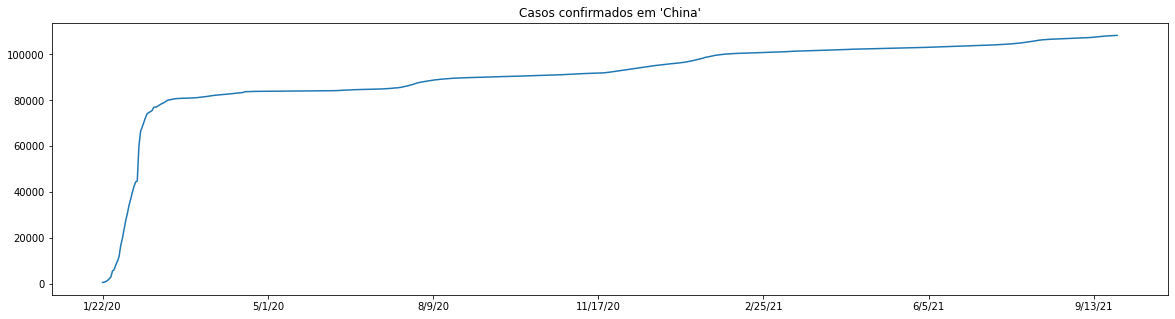

In [16]:
import matplotlib.pyplot as plt

# por isso em data visualization é FUNDAMENTAL
# estarmos atentos aos DOIS EIXOS
# esse aqui está tentando comparar o crescimento do momento inicial ao momento atual

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

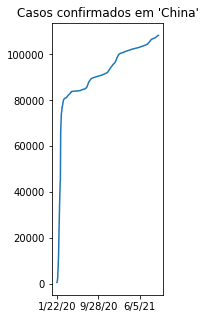

In [17]:
# gráfico extremamente apertado
# estamos sendo longo do adequado ao passar uma mensagem errada

plt.figure(figsize=(2, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

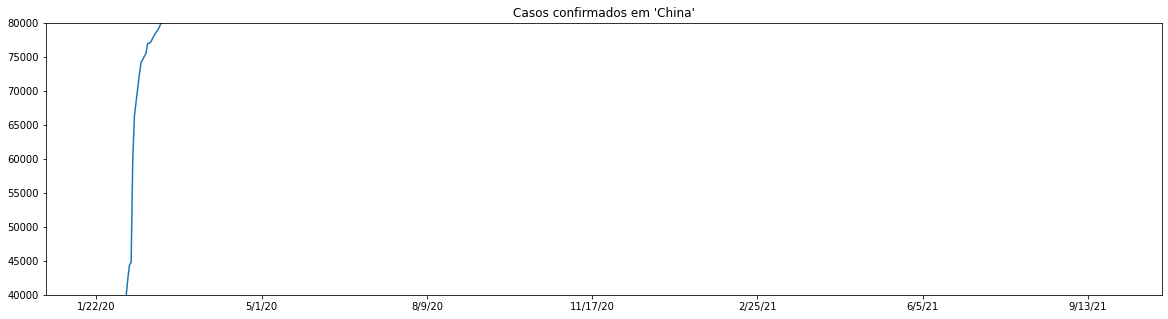

In [18]:
# exemplo ruim de manusear o eixo y

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.ylim(40000, 80000)
plt.show()

# Nos últimos 20 dias desses dados, DOBROU os casos confirmados

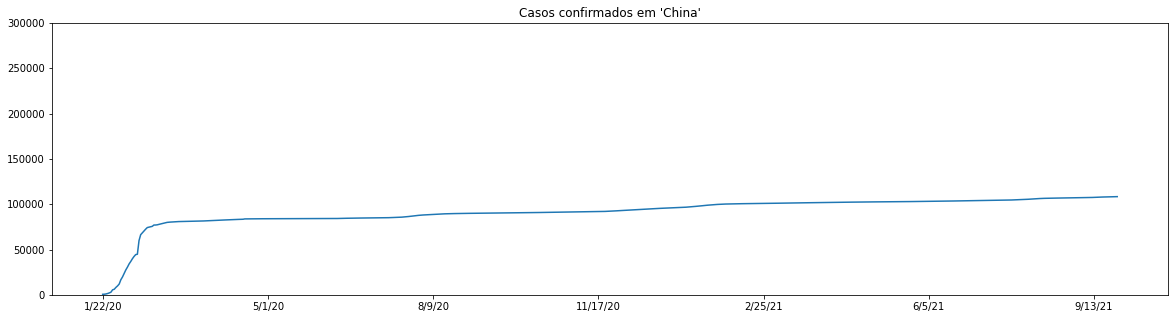

In [19]:
# exemplo ruim de manusear o eixo y
# aqui a mensagem ficou novamente diferente
# esse aqui está tentando comparar o crescimento do momento inicial com 300 mil

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.ylim(0, 300000)
plt.show()

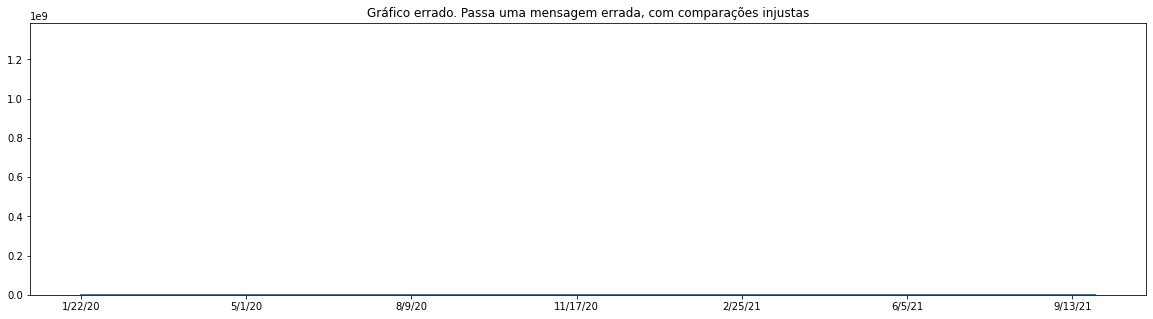

In [20]:
# exemplo ruim de manusear o eixo y
# aqui a mensagem ficou novamente diferente

# esse aqui está tentando comparar o crescimento do momento inicial com 1.386 bi (população da china em 2017)
# aqui a mensagem é novamente completamente diferente
# e pode ser uma mensagem errada, até mesmo errada. Poderia ser uma doença grava
# mas ao usarmos o eixo y com a população geral, fingimos que ela não é grave
# sendo que na realidade esse gráfico não POSSUI INFORMAÇÃO NENHUMA sobre a gravidade da doenã

# pq? só tem caso confirmado, não fala da letalidade, não fala da incidencia
# quais são as provincias infectadas? são da toda a china? estou comparando com a população toda da china. Errado!

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Gráfico errado. Passa uma mensagem errada, com comparações injustas")
plt.ylim(0, 1386000000)
plt.show()

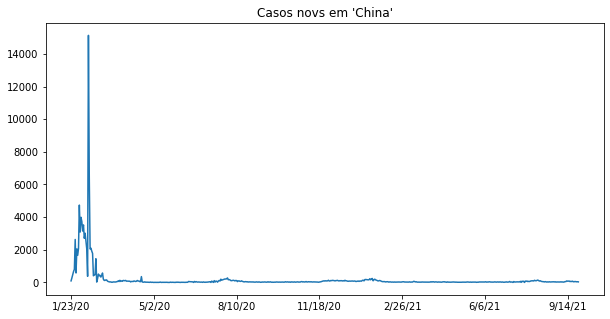

In [39]:
plt.figure(figsize=(10, 5))
plt.title("Casos novs em 'China'")
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
new_cases_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

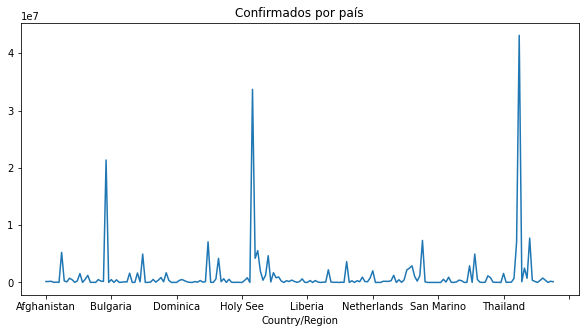

In [38]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].plot()
plt.title("Confirmados por país")

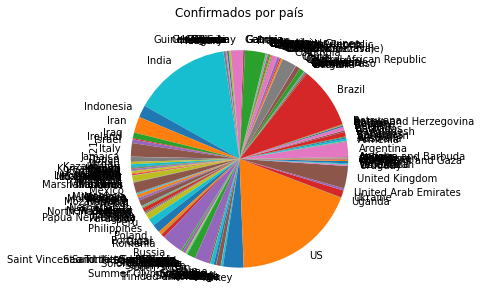

In [40]:
plt.figure(figsize=(10, 5))
# 99.99% das vezes não devemos usar gráfico de pizza e torta
# se o nome do gráfico não tem comida no meio, não use (boa prática)

# 1. muitas categorias, inviável
# 2. poucas categorias, a comparação é da área!

# ah, mas cai no 0.01% que é para usar torta/pizza
# não, não caiu. Pense novamente, se acredita que sim, pense novamente.
# se acredita que sim, assuma os riscos

confirmed_by_country[last_date].plot(kind='pie')
plt.title("Confirmados por país")
plt.show()

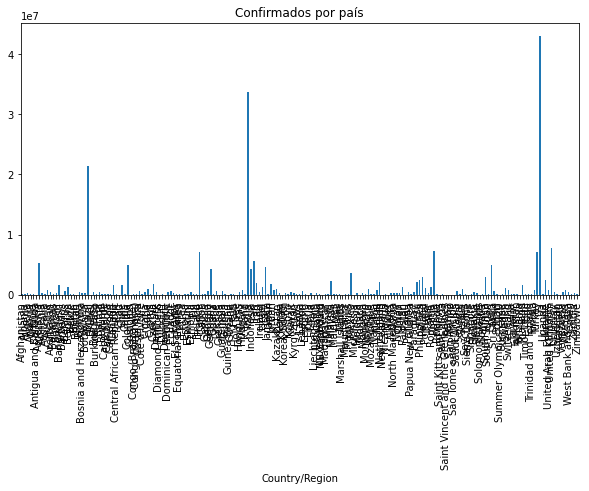

In [41]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

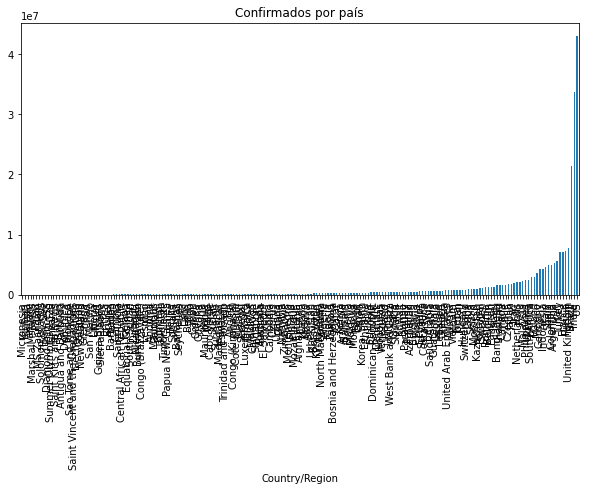

In [42]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=True).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

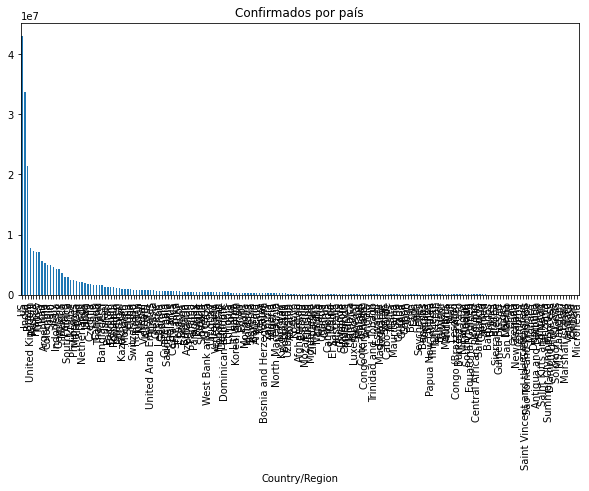

In [43]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

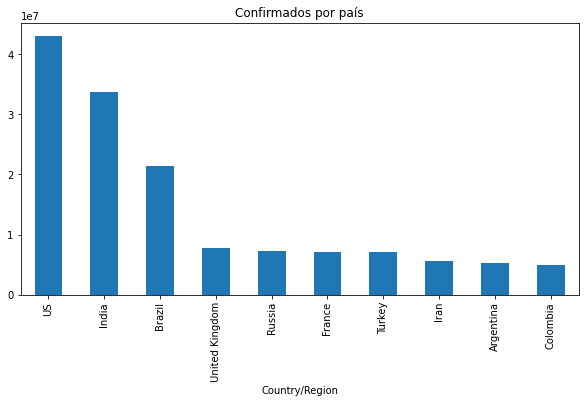

In [45]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

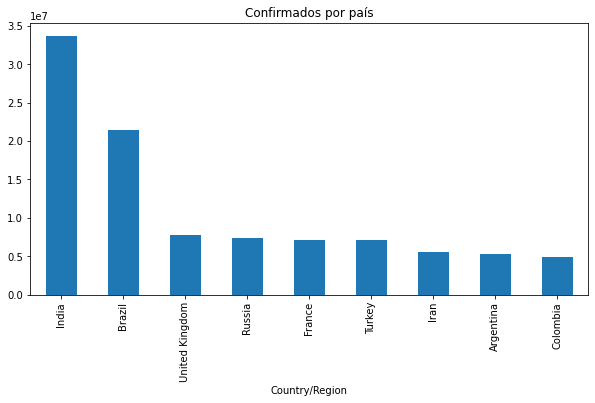

In [48]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

# Lembrando que existe um vício aqui pois paises que não testaram indivíduos
# podem sim ter casos ocorrendo mas não confirmados ainda.

In [50]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7047,7054,7065,7070,7076,7083,7090,7093,7101,7103,7109,7116,7118,7123,7127,7127,7128,7132,7141,7144,7151,7157,7164,7167,7167,7169,7171,7174,7183,7186,7186,7186,7199,7199,7199,7199,7199,7199,7199,7200
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2473,2475,2477,2478,2478,2480,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523,2528,2531,2535,2539,2543,2548,2553,2557,2563,2569,2574,2580,2587,2594,2601,2609,2619,2629,2640,2653
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4929,4957,4984,5004,5034,5063,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471,5489,5519,5539,5558,5578,5596,5614,5630,5651,5670,5681,5694,5709,5725,5739,5748,5758,5767,5777,5786
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129,129,129,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1133,1138,1140,1153,1163,1166,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299,1309,1313,1322,1327,1339,1345,1358,1360,1371,1378,1388,1388,1409,1414,1434,1460,1471,1487,1501,1513


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
confirmed.groupby("Country/Region").sum()[last_date].head()

Country/Region
Afghanistan    155072
Albania        168188
Algeria        202877
Andorra         15189
Angola          55583
Name: 9/27/21, dtype: int64

In [55]:
deaths.groupby("Country/Region").sum()[last_date].head()

Country/Region
Afghanistan    7200
Albania        2653
Algeria        5786
Andorra         130
Angola         1513
Name: 9/27/21, dtype: int64

In [ ]:
recovered.groupby("Country/Region").sum()[last_date].head()

In [61]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1].head()

display(latest_by_country(confirmed).head())
display(latest_by_country(deaths).head())
display(latest_by_country(recovered).head())

Country/Region
Afghanistan    155072
Albania        168188
Algeria        202877
Andorra         15189
Angola          55583
Name: 9/27/21, dtype: int64

Country/Region
Afghanistan    7200
Albania        2653
Algeria        5786
Andorra         130
Angola         1513
Name: 9/27/21, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 9/27/21, dtype: int64

In [60]:
informations = [latest_by_country(confirmed).head(), latest_by_country(deaths).head(), latest_by_country(recovered).head()]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered]

,9/27/21,9/27/21,9/27/21
Country/Region,,,
Afghanistan,155072,7200,0
Albania,168188,2653,0
Algeria,202877,5786,0
Andorra,15189,130,0
Angola,55583,1513,0
